# Null geodesics

The aim of this geodesic integrator is to integrate null geodesics - the geodesics of photons - in natural units where $c = G = 1$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from tqdm import tqdm

We will calculate Christoffel symbols by automatic differentiation of the metric tensor. To do this, we compute the Jacobian matrix of the metric tensor. Recall that the Jacobian matrix of a vector valued function, in tensor index notation, is given by:

$$
J_{mn} = \frac{\partial F_m}{\partial x^n}
$$

The metric tensor, however, is a matrix-valued function, so we need to add an additional index to the Jacobian, giving:

$$
J_{\mu \nu \alpha} = \frac{\partial g_{\mu \nu}}{\partial x^\alpha}
$$

We can then write the Christoffel symbols in terms of the Jacobian:

$$
\Gamma^\beta_{\mu \nu} = \frac{1}{2} g^{\beta \alpha} 
\left(\frac{\partial g_{\mu \alpha}}{\partial x^\nu} +
\frac{\partial g_{\alpha \nu}}{\partial x^\mu} -
\frac{\partial g_{\mu \nu}}{\partial x^\alpha}\right) = \frac{1}{2} g^{\beta \alpha} (J_{\mu \alpha \nu} + J_{\alpha \nu \mu} - J_{\mu \nu \alpha})
$$

We will debug by finding the Jacobian of a more simple matrix:

In [9]:
def matrix_f(coords):
    x = coords[0]
    y = coords[1]
    g = torch.zeros(2, 2)
    g[0][0] = x
    g[1][1] = y
    return g

In [10]:
def calculate_jacob(matrix, x, y):
    coord = torch.tensor([x, y], requires_grad=True)
    jacobian = torch.autograd.functional.jacobian(matrix, coord)
    return jacobian

$$
f_{\mu \nu} =
\begin{pmatrix}
x & 0 \\
0 & y 
\end{pmatrix}
$$

$$
\frac{\partial f_{\mu \nu}}{\partial x} = 
\begin{pmatrix}
1 & 0 \\
0 & 0
\end{pmatrix}
$$

$$
\frac{\partial f_{\mu \nu}}{\partial y} = 
\begin{pmatrix}
0 & 0 \\
0 & 1
\end{pmatrix}
$$

$$
J = 
\begin{bmatrix}
\frac{\partial f_{\mu \nu}}{\partial x} &
\frac{\partial f_{\mu \nu}}{\partial y}
\end{bmatrix} =
\begin{bmatrix}
\begin{bmatrix}
1 & 0 \\
0 & 0
\end{bmatrix} &
\begin{bmatrix}
0 & 0 \\
0 & 1
\end{bmatrix}
\end{bmatrix}
$$

In [21]:
calculate_jacob(matrix_f, 2.0, 2.0)

tensor([[[1., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 1.]]])

The Jacobian is correct. Now, we will check the Jacobian of the spherical Minkowski metric:

In [3]:
def minkowski_metric_spherical(coords):
    t = coords[0]
    r = coords[1]
    theta = coords[2]
    phi = coords[3]
    g = torch.zeros(4, 4)
    g[0][0] = -1
    g[1][1] = 1
    g[2][2] = r ** 2
    g[3][3] = r ** 2 * torch.sin(theta) ** 2
    return g

In [4]:
def minkowski_metric_spherical_inverse(coords):
    t = coords[0]
    r = coords[1]
    theta = coords[2]
    phi = coords[3]
    g_inv = torch.zeros(4, 4)
    g_inv[0][0] = -1
    g_inv[1][1] = 1
    g_inv[2][2] = 1 / (r ** 2)
    g_inv[3][3] = 1 / (r ** 2 * torch.sin(theta) ** 2)
    return g_inv

Given the metric:

$$
\eta_{\mu \nu} = 
\begin{pmatrix}
-1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & r^2 & 0 \\
0 & 0 & 0 & r^2 \sin^2 \theta
\end{pmatrix}
$$

The Jacobian would be:

$$
\frac{\partial \eta_{\mu \nu}}{\partial t} =
\begin{pmatrix}
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0
\end{pmatrix}
$$

$$
\frac{\partial \eta_{\mu \nu}}{\partial r} = 
\begin{pmatrix}
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 \\
0 & 0 & 2r & 0 \\
0 & 0 & 0 & 2r \sin^2 \theta
\end{pmatrix}
$$

$$
\frac{\partial \eta_{\mu \nu}}{\partial \theta} = 
\begin{pmatrix}
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & r^2 \sin(2\theta)
\end{pmatrix}
$$

$$
\frac{\partial \eta_{\mu \nu}}{\partial \phi} =
\begin{pmatrix}
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0
\end{pmatrix}
$$

$$
J =
\begin{bmatrix}
\begin{bmatrix}
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0
\end{bmatrix} &
\begin{bmatrix}
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 \\
0 & 0 & 2r & 0 \\
0 & 0 & 0 & 2r \sin^2 \theta
\end{bmatrix} &
\begin{bmatrix}
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & r^2 \sin(2\theta)
\end{bmatrix} &
\begin{bmatrix}
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0
\end{bmatrix}
\end{bmatrix} 
$$

In [18]:
def test_minkowski_jacob(metric, t, r, theta, phi):
    coord = torch.tensor([t, r, theta, phi], requires_grad=True)
    jacobian = torch.autograd.functional.jacobian(metric, coord)
    return jacobian

In [24]:
m_jacob = test_minkowski_jacob(minkowski_metric_spherical, 0.0, 1.0, np.pi / 4, 0.0)

In [28]:
m_jacob[:, :, 0]

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [27]:
m_jacob[:, :, 1]

tensor([[0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 2.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 1.0000]])

In [29]:
m_jacob[:, :, 2]

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 1.]])

In [30]:
m_jacob[:, :, 3]

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

We will now test the correct Christoffel symbols from the Jacobian, and compare to the analytically-derived solutions from the [Catalogue of Spacetimes](https://arxiv.org/pdf/0904.4184.pdf):

In [114]:
def correct_christoffels(t, r, theta, phi):
    # Don't forget that the Christoffel symbols
    # are symmetric on their lower indices!
    gamma = np.zeros((4, 4, 4))
    gamma[1, 2, 2] = -r
    gamma[1, 3, 3] = -r * (np.sin(theta) ** 2)
    gamma[2, 1, 2] = 1 / r
    gamma[2, 2, 1] = 1 / r
    gamma[2, 3, 3] = -np.sin(theta) * np.cos(theta)
    gamma[3, 1, 3] = 1 / r
    gamma[3, 3, 1] = 1 / r
    gamma[3, 2, 3] = 1 / np.tan(theta)
    gamma[3, 3, 2] = 1 / np.tan(theta)
    return gamma

In [125]:
def create_inverse_metric(inverse_metric, x0, x1, x2, x3):
    coords = torch.tensor([x0, x1, x2, x3])
    return inverse_metric(coords) # we don't need it to be differentiable

In [37]:
mink_inv = create_inverse_metric(minkowski_metric_spherical_inverse, 0.0, 1.0, np.pi / 4, 0.0)

In [1003]:
def christoffel_4d_from_jacob(jacob, inverse_metric):
    Gamma = np.zeros((4, 4, 4))
    for beta in range(4):
        for mu in range(4):
            for nu in range(4):
                for alpha in range(4):
                    # Note here: the first 2 indices of the Jacobian
                    # are interchangeable, we only need worry
                    # about the 3rd index, which is what coordinate
                    # the derivative is taken with respect to
                    Gamma[beta, mu, nu] += 0.5 * inverse_metric[beta, alpha] * (jacob[mu, alpha, nu] \
                                        + jacob[alpha, nu, mu] \
                                        - jacob[mu, nu, alpha])
    return Gamma

In [104]:
autodiff_ch = christoffel_4d_from_jacob(m_jacob, mink_inv)

In [115]:
correct_ch = correct_christoffels(0.0, 1.0, np.pi / 4, 0.0)

In [116]:
autodiff_ch[0]

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [117]:
correct_ch[0]

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [118]:
autodiff_ch[1]

array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        , -1.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , -0.50000006]])

In [119]:
correct_ch[1]

array([[ 0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. , -1. ,  0. ],
       [ 0. ,  0. ,  0. , -0.5]])

In [120]:
autodiff_ch[2]

array([[ 0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  1. ,  0. ],
       [ 0. ,  1. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , -0.5]])

In [121]:
correct_ch[2]

array([[ 0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  1. ,  0. ],
       [ 0. ,  1. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , -0.5]])

In [122]:
autodiff_ch[3]

array([[0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 1.        ],
       [0.        , 0.        , 0.        , 0.99999988],
       [0.        , 1.        , 0.99999988, 0.        ]])

In [123]:
correct_ch[3]

array([[0., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 1., 0.]])

As it can be seen, all of them are correct. However, we will first write a geodesic integrator that doesn't use automatic differentiation.

First, we create a Runge-Kutta 4th order solver:

In [704]:
def rk4(f, u0, t0, tf, n, debug=False):
    """
    Expects a function in the form y' = f(y, t) to solve
    f - function, MUST return numpy array of derivatives
    u0 - initial values
    t0 - initial time
    tf - final time
    n - number of samples
    """
    t = np.linspace(t0, tf, n+1)
    u = np.zeros((n+1, len(u0)))
    u[0] = u0
    h = (tf - t0) / n
    for i in tqdm(range(n)):
        if debug:
            print("Value of derivative:", f(u[i], t[i]))
        k1 = h * f(u[i], t[i])    
        k2 = h * f(u[i] + 0.5 * k1, t[i] + 0.5*h)
        k3 = h * f(u[i] + 0.5 * k2, t[i] + 0.5*h)
        k4 = h * f(u[i] + k3, t[i] + h)
        u[i+1] = u[i] + (k1 + 2*(k2 + k3 ) + k4) / 6
    return u, t

To test the differential equation solver, we solve the simple differential equation $\frac{d^2 x}{dt^2} = -\omega^2 t$, with initial conditions $x(0) = 1$ and $v(0) = 0$. To do so, we set $\frac{dx}{dt} = v$, and we can then write the second-order ODE as a set of 2 1st-order ODEs:

$$
\frac{dx}{dt} = v
$$

$$
\frac{dv}{dt} = -\omega^2 t
$$

The analytical solution is given by:

In [325]:
u0_test = np.array([1, 0])

In [326]:
def test_d_dt(X, t, omega=1):
    x = X[0]
    v = X[1]
    dx_dt = v
    dv_dt = -(omega ** 2) * x
    return np.array([dx_dt, dv_dt])

In [327]:
x_sol_test, t_sol_test = rk4(test_d_dt, u0_test, 0, 2 * np.pi, 600)

100%|████████████████████████████████████████████████████████████| 600/600 [00:00<00:00, 13857.07it/s]


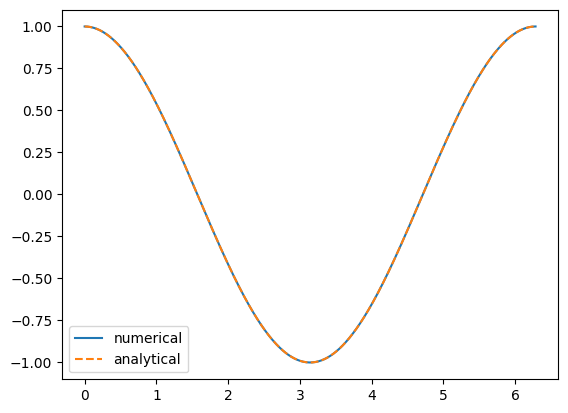

In [406]:
plt.plot(t_sol_test, x_sol_test[:, 0], label="numerical")
plt.plot(t_sol_test, np.cos(t_sol_test), label="analytical", linestyle="dashed")
plt.legend()
plt.show()

$$
\frac{d^2 t}{ds^2} = -\frac{2M}{r^2 \sigma} \frac{dt}{ds} \frac{dr}{ds}
$$

$$
\frac{d^2 r}{ds^2} = -\frac{M\sigma}{r^2} \left(\frac{dt}{ds}\right)^2 + \frac{M}{r^2 \sigma} \left(\frac{dr}{ds}\right)^2 + r\sigma \left(\left(\frac{d\theta}{ds}\right)^2 + \sin^2\theta \left(\frac{d\phi}{ds}\right)^2\right)
$$

$$
\frac{d^2 \theta}{ds^2} = -\frac{2}{r} \frac{dr}{ds} \frac{d\theta}{ds} + \sin \theta \cos \theta \left(\frac{d\phi}{ds}\right)^2
$$

$$
\frac{d^2 \phi}{ds^2} = -\frac{2}{r} \frac{dr}{ds} \frac{d\phi}{ds} - 2\frac{\cos \theta}{\sin \theta} \frac{d\theta}{ds}\frac{d\phi}{ds}
$$

We can now numerically integrate for a Schwarzschild orbit using the typical system of equations for Schwarzschild spacetime (source: https://arxiv.org/pdf/2304.12823.pdf)

$$
\frac{dt}{ds} = \frac{e}{\sigma}
$$

$$
\frac{dr}{ds} = \left[e^2 - \frac{\sigma l^2}{r^2} \right]^{1/2}
$$

$$
\frac{d\theta}{ds} = 0
$$

$$
\frac{d\phi}{ds} = \frac{l}{r^2}
$$

where $\sigma = 1 - \frac{2M}{r}$.

Where $l = \frac{L}{m}$ (that is, angular momentum per unit mass), and where the initial velocity is given by:

$$
U^\mu = \left(\frac{1}{1 - \frac{2M}{r}}, \pm 1, 0, 0\right)
$$

Note that for our example, using mass-energy equivalence for photons, $l = \frac{L}{pc^2}$ or simply $L / p$ in geometrized units.

In [281]:
M = 1

In [282]:
def d_dt_schwarzschild(X, s, M=M, l=5, e=1):
    r, phi = X
    sigma = 1 - (2 * M) / r
    dr_ds = (e ** 2 - (l ** 2 * sigma) / (r ** 2)) ** (1/2)
    dphi_ds = l / (r ** 2)
    return np.array([dr_ds, dphi_ds])

In [283]:
sch_u0 = np.array([2 * M, 0])

In [267]:
# sch_u0 = np.array([0, 6 * M, np.pi / 2, np.pi / 3])

In [284]:
sch_x_sol, sch_t = rk4(d_dt_schwarzschild, sch_u0, 0, 10, 500)

100%|████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 13284.46it/s]


In [285]:
r_sch = sch_x_sol[:, 0]
phi_sch = sch_x_sol[:, 1]

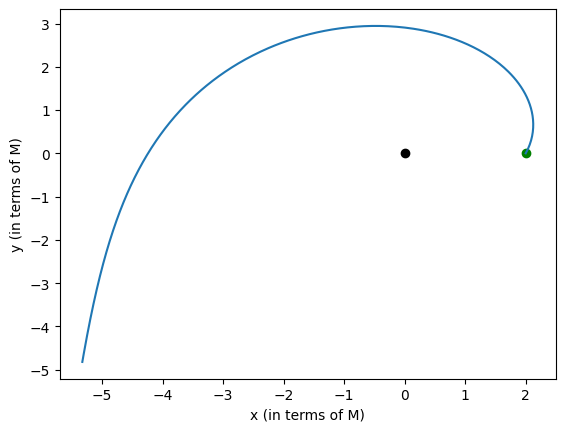

In [286]:
plt.plot(r_sch * np.cos(phi_sch), r_sch * np.sin(phi_sch))
plt.scatter(r_sch[0] * np.cos(phi_sch)[0], r_sch[0] * np.sin(phi_sch)[0], color="green")
plt.scatter(0, 0, color="black")
plt.xlabel("x (in terms of M)")
plt.ylabel("y (in terms of M)")
plt.show()

These equations can be put together to yield a single differential equation (see http://spiro.fisica.unipd.it/~antonell/schwarzschild/):

$$
\left(\frac{dr}{d\phi}\right)^2 = \frac{r^4}{b^2} - \left( 1 - \frac{2M}{r} \right) \left( \frac{r^4}{a^2} + r^2 \right)
$$

Here $b = l/e$ and $a = l$.

Now, this is not a very useful solution to immediately use, given the square root. Therefore, it is useful to differentiate the above equation with respect to $\phi$ one time, to get:

$$
2 \frac{dr}{d\phi} \frac{d^2 r}{d\phi^2} = \frac{4 r^3}{b^2} \frac{dr}{d\phi} - \frac{2M}{r^2} \left(\frac{r^4}{a^2} + r^2\right) \frac{dr}{d\phi} - \left(2r + \frac{4r^3}{a^4}\right) \frac{dr}{d\phi}
$$

Which simplifies to:

$$
\frac{d^2 r}{d\phi^2} = \frac{2r^3}{b^2} - \frac{M}{r^2} \left(\frac{r^4}{a^2} + r^2\right) - \left(r + \frac{2r^3}{a^4}\right)
$$

This equation is much easier to numerically integrate, and will be the equation of choice to integrate.

Lastly, there is one final set of possible differential equations to use. If we take the original $r$ and $\phi$ equations, and take their second derivatives, we get:

$$
\frac{d^2 r}{ds^2} = -\frac{M}{r^2} + \frac{l^2}{r^3} - \frac{3Ml^2}{r^4}
$$

$$
\frac{d^2 \phi}{ds^2} = -\frac{2l}{r^3} \frac{dr}{ds}
$$

In [1106]:
def d_ds_schwarzschild_2(X, s, M=M, l=5, e=1):
    r, phi, v_r, v_phi = X
    d2r_ds = -M / (r ** 2) + (l ** 2) / (r ** 3) - (3 * M * l ** 2) / (r ** 4)
    d2phi_ds = -2 / (r ** 3) * v_r
    return np.array([v_r, v_phi, d2r_ds, d2phi_ds])

In [1107]:
sch_u0 = np.array([2 * M, 0, 1, 0])

In [1108]:
sch_x_sol, sch_t = rk4(d_ds_schwarzschild_2, sch_u0, 0, 3.1, 500)

100%|█████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 7953.55it/s]


In [1109]:
r_sch = sch_x_sol[:, 0]
phi_sch = sch_x_sol[:, 1]

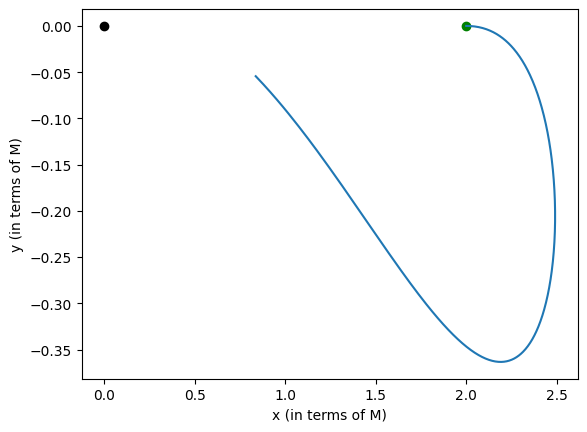

In [506]:
plt.plot(r_sch * np.cos(phi_sch), r_sch * np.sin(phi_sch))
plt.scatter(r_sch[0] * np.cos(phi_sch)[0], r_sch[0] * np.sin(phi_sch)[0], color="green")
plt.scatter(0, 0, color="black")
plt.xlabel("x (in terms of M)")
plt.ylabel("y (in terms of M)")
plt.show()

In [467]:
sch_u0_2 = np.array([5 * M, np.pi / 3, 1, 0])

In [471]:
sch_x_sol, sch_t = rk4(d_ds_schwarzschild_2, sch_u0_2, 0, 100, 500)

100%|████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 13826.71it/s]


In [472]:
r_sch = sch_x_sol[:, 0]
phi_sch = sch_x_sol[:, 1]

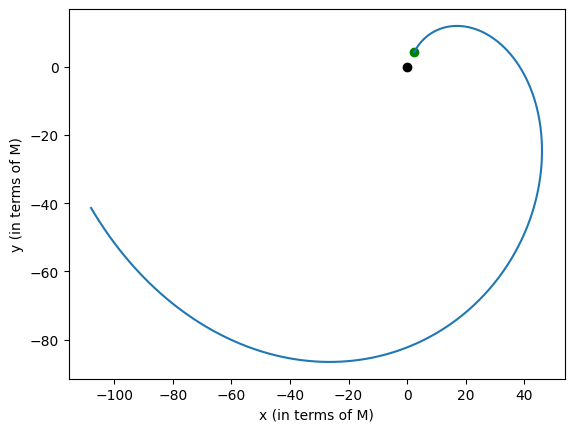

In [473]:
plt.plot(r_sch * np.cos(phi_sch), r_sch * np.sin(phi_sch))
plt.scatter(r_sch[0] * np.cos(phi_sch)[0], r_sch[0] * np.sin(phi_sch)[0], color="green")
plt.scatter(0, 0, color="black")
plt.xlabel("x (in terms of M)")
plt.ylabel("y (in terms of M)")
plt.show()

In [474]:
sch_u0_2 = np.array([7 * M, np.pi / 3, -1, 0])

In [487]:
sch_x_sol, sch_t = rk4(d_ds_schwarzschild_2, sch_u0_2, 0, 5.7, 500)

100%|████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 12520.68it/s]


In [488]:
r_sch = sch_x_sol[:, 0]
phi_sch = sch_x_sol[:, 1]

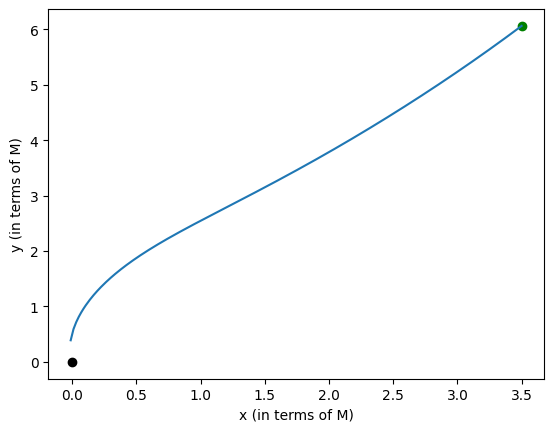

In [489]:
plt.plot(r_sch * np.cos(phi_sch), r_sch * np.sin(phi_sch))
plt.scatter(r_sch[0] * np.cos(phi_sch)[0], r_sch[0] * np.sin(phi_sch)[0], color="green")
plt.scatter(0, 0, color="black")
plt.xlabel("x (in terms of M)")
plt.ylabel("y (in terms of M)")
plt.show()

In [609]:
sch_u0_3 = np.array([6 * M, 0, -1, 1])

In [610]:
sch_x_sol, sch_t = rk4(d_ds_schwarzschild_2, sch_u0_3, 0, 4, 500)

100%|████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 11237.73it/s]


In [242]:
# def d_dt_schwarzschild(X, s, M=M, l=500, e=1):
#     t, r, theta, phi = X
#     sigma = 1 - (2 * M) / r
#     dt_ds = e / sigma
#     dr_ds = (e ** 2 - (l ** 2 * sigma) / (r ** 2)) ** (1/2)
#     dtheta_ds = 0
#     dphi_ds = l / (r ** 2)
#     return np.array([dt_ds, dr_ds, dtheta_ds, dphi_ds])

In [611]:
r_sch = sch_x_sol[:, 0]
phi_sch = sch_x_sol[:, 1]

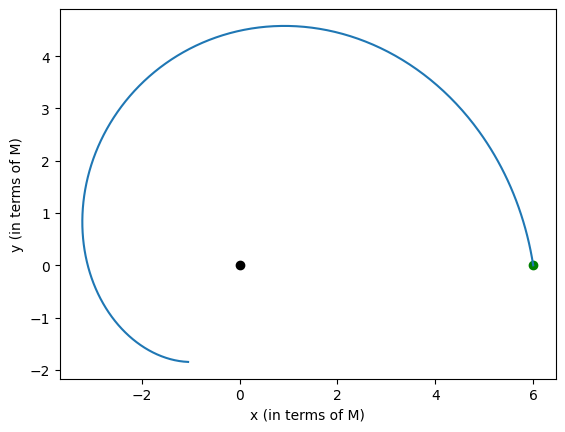

In [612]:
plt.plot(r_sch * np.cos(phi_sch), r_sch * np.sin(phi_sch))
plt.scatter(r_sch[0] * np.cos(phi_sch)[0], r_sch[0] * np.sin(phi_sch)[0], color="green")
plt.scatter(0, 0, color="black")
plt.xlabel("x (in terms of M)")
plt.ylabel("y (in terms of M)")
plt.show()

In [711]:
sch_u0_4 = np.array([6 * M, 0, 0, 1])

In [721]:
sch_x_sol, sch_t = rk4(d_ds_schwarzschild_2, sch_u0_4, 0, 5, 500)

100%|████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 14398.77it/s]


In [722]:
r_sch = sch_x_sol[:, 0]
phi_sch = sch_x_sol[:, 1]

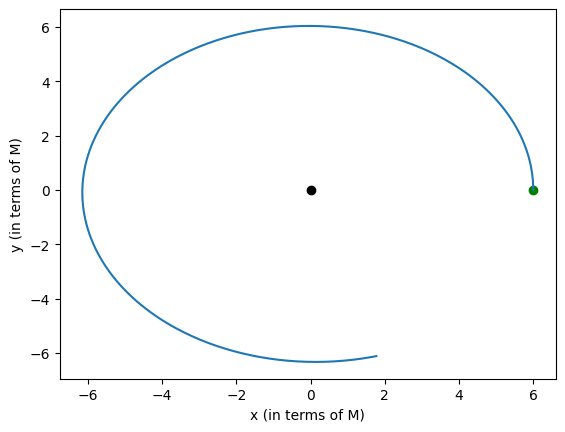

In [723]:
plt.plot(r_sch * np.cos(phi_sch), r_sch * np.sin(phi_sch))
plt.scatter(r_sch[0] * np.cos(phi_sch)[0], r_sch[0] * np.sin(phi_sch)[0], color="green")
plt.scatter(0, 0, color="black")
plt.xlabel("x (in terms of M)")
plt.ylabel("y (in terms of M)")
plt.show()

Finally, note that these equations require prior knowledge of $L$ and $E$, the angular momentum and energy of a photon. If we don't know the values of these constants of motion, we can use the more general geodesic equations for Schwarzschild spacetime:

$$
\frac{d^2 t}{ds^2} = -\frac{2M}{r^2 \sigma} \frac{dt}{ds} \frac{dr}{ds}
$$

$$
\frac{d^2 r}{ds^2} = -\frac{M\sigma}{r^2} \left(\frac{dt}{ds}\right)^2 + \frac{M}{r^2 \sigma} \left(\frac{dr}{ds}\right)^2 + r\sigma \left(\left(\frac{d\theta}{ds}\right)^2 + \sin^2\theta \left(\frac{d\phi}{ds}\right)^2\right)
$$

$$
\frac{d^2 \theta}{ds^2} = -\frac{2}{r} \frac{dr}{ds} \frac{d\theta}{ds} + \sin \theta \cos \theta \left(\frac{d\phi}{ds}\right)^2
$$

$$
\frac{d^2 \phi}{ds^2} = -\frac{2}{r} \frac{dr}{ds} \frac{d\phi}{ds} - 2\frac{\cos \theta}{\sin \theta} \frac{d\theta}{ds}\frac{d\phi}{ds}
$$

We know that $\theta = \frac{\pi}{2}$ is a valid solution to the above system of equations, so we have:

$$
\frac{d^2 t}{ds^2} = -\frac{2M}{r^2 \sigma} \frac{dt}{ds} \frac{dr}{ds}
$$

$$
\frac{d^2 r}{ds^2} = -\frac{M\sigma}{r^2} \left(\frac{dt}{ds}\right)^2 + \frac{M}{r^2 \sigma} \left(\frac{dr}{ds}\right)^2 + r\sigma \left(\frac{d\phi}{ds}\right)^2
$$

$$
\frac{d^2 \phi}{ds^2} = -\frac{2}{r} \frac{dr}{ds} \frac{d\phi}{ds}
$$

Now we find the null vectors corresponding to the Schwarzschild metric (derivation from _A Most Incomprehensible Thing_). Since (setting the final 2 terms of the metric to zero):

$$
ds^2 = \sigma dt^2 - \sigma^{-1} dr^2 = 0
$$

Therefore:

$$
\sigma^2 dt^2 = dr^2
$$

And:

$$
\frac{dr}{ds} = \pm \left(1 - \frac{2M}{r}\right)
$$

Thus:

$$
U^\mu = \left(1, \pm \left(1 - \frac{2M}{r}\right), 0, 0\right)
$$

In [904]:
M = 2e30 # solar mass

In [957]:
sch_t0 = 0
sch_r0 = 6 * M
sch_phi0 = 0

# From a null vector
sch_v_t0 = 1
# can be positive or negative
sch_v_r0 = (1 - (2 * M) / sch_r0)
sch_v_phi0 = 0.3

In [958]:
def d2_dt_schwarzschild(X, s, M=M):
    t, r, phi = X[:3]
    v_t, v_r, v_phi = X[3:]
    sigma = 1 - (2 * M) / r
    
    # compute second derivatives
    d2t_ds = -(2 * M) / (r ** 2 * sigma) * v_t * v_r
    d2r_ds = -(M * sigma) / (r ** 2) * (v_t ** 2) \
                + M / (r ** 2 * sigma) * (v_r ** 2) \
                + r * sigma * (v_phi ** 2)
    d2phi_ds = -2/r * v_r * v_phi
    
    return np.array([v_t, v_r, v_phi, d2t_ds, d2r_ds, d2phi_ds])

In [959]:
sch_u0 = np.array([sch_t0, sch_r0, sch_phi0, sch_v_t0, sch_v_r0, sch_v_phi0])

In [960]:
sch_x_sol, sch_t = rk4(d2_dt_schwarzschild, sch_u0, 0, 15, 100)

100%|█████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 6473.39it/s]


In [961]:
r_sch = sch_x_sol[:, 1]
phi_sch = sch_x_sol[:, 2]

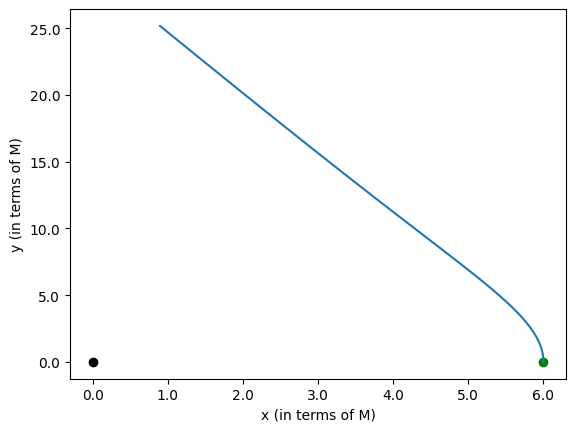

In [962]:
masses_ticker = lambda x, pos: f"{x / M:.1f}"

ax = plt.figure().add_subplot()
ax.yaxis.set_major_formatter(masses_ticker)
ax.xaxis.set_major_formatter(masses_ticker)
ax.plot(r_sch * np.cos(phi_sch), r_sch * np.sin(phi_sch))
ax.scatter(r_sch[0] * np.cos(phi_sch)[0], r_sch[0] * np.sin(phi_sch)[0], color="green")
ax.scatter(0, 0, color="black")
ax.set_xlabel("x (in terms of M)")
ax.set_ylabel("y (in terms of M)")
plt.show()

In [963]:
sch_u0_2 = np.array([sch_t0, 10 * M, sch_phi0, sch_v_t0, sch_v_r0, sch_v_phi0])

In [967]:
sch_x_sol, sch_t = rk4(d2_dt_schwarzschild, sch_u0_2, 0, 15, 100)

100%|█████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 6452.08it/s]


In [968]:
r_sch = sch_x_sol[:, 1]
phi_sch = sch_x_sol[:, 2]

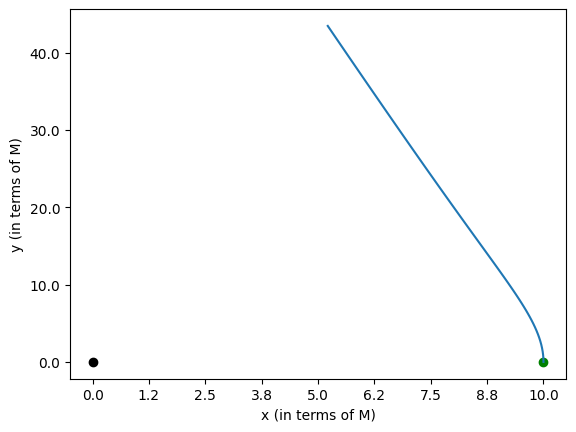

In [969]:
masses_ticker = lambda x, pos: f"{x / M:.1f}"

ax = plt.figure().add_subplot()
ax.yaxis.set_major_formatter(masses_ticker)
ax.xaxis.set_major_formatter(masses_ticker)
ax.plot(r_sch * np.cos(phi_sch), r_sch * np.sin(phi_sch))
ax.scatter(r_sch[0] * np.cos(phi_sch)[0], r_sch[0] * np.sin(phi_sch)[0], color="green")
ax.scatter(0, 0, color="black")
ax.set_xlabel("x (in terms of M)")
ax.set_ylabel("y (in terms of M)")
plt.show()

In [993]:
sch_u0_3 = np.array([sch_t0, 3 * M, sch_phi0, sch_v_t0, sch_v_r0, 0.03])

In [994]:
sch_x_sol, sch_t = rk4(d2_dt_schwarzschild, sch_u0_3, 0, 100, 100)

100%|████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 11492.82it/s]


In [995]:
r_sch = sch_x_sol[:, 1]
phi_sch = sch_x_sol[:, 2]

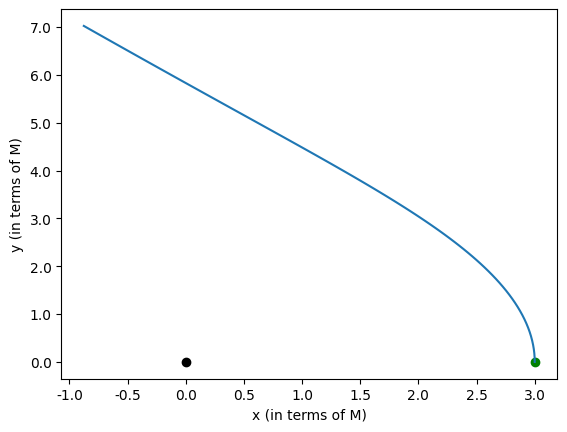

In [997]:
masses_ticker = lambda x, pos: f"{x / M:.1f}"

ax = plt.figure().add_subplot()
ax.yaxis.set_major_formatter(masses_ticker)
ax.xaxis.set_major_formatter(masses_ticker)
ax.plot(r_sch * np.cos(phi_sch), r_sch * np.sin(phi_sch))
ax.scatter(r_sch[0] * np.cos(phi_sch)[0], r_sch[0] * np.sin(phi_sch)[0], color="green")
ax.scatter(0, 0, color="black")
ax.set_xlabel("x (in terms of M)")
ax.set_ylabel("y (in terms of M)")
plt.show()

Now, we can finally use automatic differentiation to plot null geodesics. We will test it on the Schwarzschild metric first.  We solve the geodesic equation as a system of 1st-order differential equations:

$$
\frac{dx^\mu}{ds} = U^\mu
$$

$$
\frac{d U^\mu}{ds} = -\Gamma^\mu_{\alpha \beta} \frac{dx^\alpha}{ds} \frac{dx^\beta}{ds}
$$

We will first test by adding the Christoffel symbols for the Schwarzschild metric manually:

In [1165]:
M = 2e30

In [1188]:
def schwarzschild_christoffels(coords, M=M):
    t = coords[0]
    r = coords[1]
    theta = coords[2]
    phi = coords[3]
    
    # Symbols
    Gamma = np.zeros((4, 4, 4))
    rs = 2 * M
    Gamma[1][0][0] = (rs * (r - rs)) / (2 * r ** 3)
    Gamma[0][0][1] = rs / (2 * r * (r - rs))
    Gamma[1][1][1] = -rs / (2 * r * (r - rs))
    Gamma[2][1][2] = 1 / r
    Gamma[3][1][3] = 1 / r
    Gamma[1][2][2] = -(r - rs)
    Gamma[3][2][3] = np.sin(theta) / np.cos(theta)
    Gamma[1][3][3] = -(r - rs) * (np.sin(theta) ** 2)
    Gamma[2][3][3] = -np.sin(theta) * np.cos(theta)
    # mirror christoffels
    Gamma[0][1][0] = rs / (2 * r * (r - rs))
    Gamma[2][2][1] = 1 / r
    Gamma[3][3][1] = 1 / r
    Gamma[3][3][2] = np.sin(theta) / np.cos(theta)
    return Gamma

We will now use the pre-prepared christoffel symbols to find the geodesics:

In [1167]:
def sch_metric_d_ds(X, s):
    """
    The value of the 4 first and 4 second
    derivatives with respect to an affine
    parameter s
    """
    # Create a new vector to hold the new positions and velocities
    # after each step
    u = np.zeros(X.shape)
    # X is a vector with 4 components of position
    # and 4 components of velocity
    x = X[:4]
    velocities = X[4:]
    # Find the first 4 derivatives (dx/ds) - these are the
    # components of 4-velocity
    u[:4] = velocities
    # Find christoffel symbols
    Gamma = schwarzschild_christoffels(x)
    # Given the christoffel symbols, calculate the next 4
    # derivatives (dU/ds) - these are the components of
    # 4-acceleration
    for mu in range(4):
        for alpha in range(4):
            for beta in range(4):
                # Solve for x components
                # we sum due to the Einstein summation convention
                u[4 + mu] += -Gamma[mu][alpha][beta] * velocities[alpha] * velocities[beta]
    return u

In [1168]:
sch_u0 = np.array([sch_t0, 6 * M, 0, sch_phi0, sch_v_t0, sch_v_r0, 0, 0.03])

In [1169]:
sch_x_sol, sch_t = rk4(sch_metric_d_ds, sch_u0, 0, 200, 200)

100%|█████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 1144.28it/s]


In [1170]:
r_sch = sch_x_sol[:, 1]
phi_sch = sch_x_sol[:, 3]

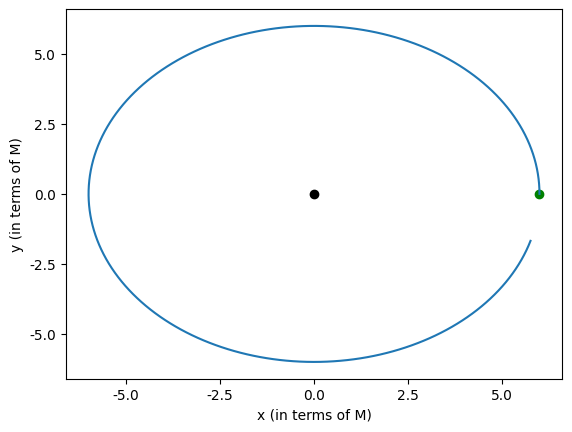

In [1171]:
masses_ticker = lambda x, pos: f"{x / M:.1f}"

ax = plt.figure().add_subplot()
ax.yaxis.set_major_formatter(masses_ticker)
ax.xaxis.set_major_formatter(masses_ticker)
ax.plot(r_sch * np.cos(phi_sch), r_sch * np.sin(phi_sch))
ax.scatter(r_sch[0] * np.cos(phi_sch)[0], r_sch[0] * np.sin(phi_sch)[0], color="green")
ax.scatter(0, 0, color="black")
ax.set_xlabel("x (in terms of M)")
ax.set_ylabel("y (in terms of M)")
plt.show()

We will now test the Schwarzschild christoffel symbols as compared to the analytical symbols:

In [1172]:
M = 1

In [1173]:
def sch_metric(coords, M=M):
    t = coords[0]
    r = coords[1]
    theta = coords[2]
    phi = coords[3]
    r_s = 2 * M
    g = torch.zeros(4, 4)
    g[0][0] = -(1 - (r_s / r))
    g[1][1] = 1 / (1 - (r_s / r))
    g[2][2] = r ** 2
    g[3][3] = r ** 2 * (torch.sin(theta) ** 2)
    return g

def inv_sch_metric(coords, M=M):
    # Only needs to be numpy-compatible
    # thus we don't use a torch tensor
    t = coords[0]
    r = coords[1]
    theta = coords[2]
    phi = coords[3]
    r_s = 2 * M
    g = np.zeros((4, 4))
    g[0][0] = 1 / -(1 - (r_s / r))
    g[1][1] = 1 - (r_s / r)
    g[2][2] = 1 / (r ** 2)
    g[3][3] = 1 / (r ** 2 * (np.sin(theta) ** 2))
    return g

In [1174]:
def create_inverse_metric(inverse_metric, x0, x1, x2, x3):
    # As it doesn't need to be differentiable we can simply
    # use a numpy array
    coords = np.array([x0, x1, x2, x3])
    return inverse_metric(coords) # we don't need it to be differentiable

In [1175]:
def metric_jacob(metric, x0, x1, x2, x3):
    coord = torch.tensor([x0, x1, x2, x3], requires_grad=True)
    jacobian = torch.autograd.functional.jacobian(metric, coord)
    return jacobian

In [1176]:
def calculate_christoffels(x0, x1, x2, x3, metric=sch_metric, inverse_metric=inv_sch_metric):
    m_jacob = metric_jacob(metric, x0, x1, x2, x3)
    print(m_jacob)
    inverse_m = create_inverse_metric(inverse_metric, x0, x1, x2, x3)
    Gamma = christoffel_4d_from_jacob(m_jacob, inverse_m)
    return Gamma

In [1184]:
M = 1

In [1185]:
test_sch_vals = [1, 6 * M, np.pi / 2, 0]

In [1186]:
analytical_ch = schwarzschild_christoffels(test_sch_vals)

In [1193]:
calculated_ch = calculate_christoffels(sch_t0, sch_r0, sch_theta0, sch_phi0)

tensor([[[0.0000e+00, 0.0000e+00,        nan, 0.0000e+00],
         [0.0000e+00, 0.0000e+00,        nan, 0.0000e+00],
         [0.0000e+00, 0.0000e+00,        nan, 0.0000e+00],
         [0.0000e+00, 0.0000e+00,        nan, 0.0000e+00]],

        [[0.0000e+00, 0.0000e+00,        nan, 0.0000e+00],
         [0.0000e+00, 0.0000e+00,        nan, 0.0000e+00],
         [0.0000e+00, 0.0000e+00,        nan, 0.0000e+00],
         [0.0000e+00, 0.0000e+00,        nan, 0.0000e+00]],

        [[0.0000e+00, 0.0000e+00,        nan, 0.0000e+00],
         [0.0000e+00, 0.0000e+00,        nan, 0.0000e+00],
         [0.0000e+00, 2.4000e+31,        nan, 0.0000e+00],
         [0.0000e+00, 0.0000e+00,        nan, 0.0000e+00]],

        [[0.0000e+00, 0.0000e+00,        nan, 0.0000e+00],
         [0.0000e+00, 0.0000e+00,        nan, 0.0000e+00],
         [0.0000e+00, 0.0000e+00,        nan, 0.0000e+00],
         [0.0000e+00, 2.4000e+31,       -inf, 0.0000e+00]]])


In [1122]:
analytical_ch[0]

array([[0.00000000e+00, 6.94444444e-63, 0.00000000e+00, 0.00000000e+00],
       [6.94444444e-63, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [1123]:
calculated_ch[0]

array([[nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan]])

In [1124]:
analytical_ch[1]

array([[ 6.94444444e-63,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00, -6.94444444e-63,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -1.20000000e+31,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -1.20000000e+31]])

In [1125]:
calculated_ch[1]

array([[nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan]])

We create a general function for taking the Jacobian of a metric:

We now 

In [ ]:
def kerr_metric(coords, M=15000, a=0.97):
    t = coords[0]
    r = coords[1]
    theta = coords[2]
    phi = coords[3]
    sigma = r ** 2 + a ** 2 * torch.cos(theta) ** 2
    delta = r ** 2 - 2 * M * r + a ** 2
    g = torch.zeros(4, 4)
    g[0][0] = -(1 - (2 * M * r) /sigma)
    g[0][3] = -(2 * M * r * a * torch.sin(theta) ** 2) / sigma
    g[1][1] = sigma / delta
    g[2][2] = sigma
    g[3][0] = -(2 * M * r * a * torch.sin(theta) ** 2) / sigma
    g[3][3] = (r ** 2 + a ** 2 + (2 * M * r * a ** 2)/sigma * torch.sin(theta) ** 2) * torch.sin(theta) ** 2
    return g

def kerr_inverse_metric(coords, M=15000, a=0.97):
    # Based off https://www.roma1.infn.it/teongrav/onde19_20/kerr.pdf
    t = coords[0]
    r = coords[1]
    theta = coords[2]
    phi = coords[3]
    sigma = r ** 2 + a ** 2 * torch.cos(theta) ** 2
    delta = r ** 2 - 2 * M * r + a ** 2
    g_inv = torch.zeros(4, 4)
    g_inv[0][0] = -1 / delta * (r ** 2 + a ** 2 + (2 * M * r * a ** 2) / sigma * torch.sin(theta) ** 2)
    g_inv[0][3] = -(2 * M * r * a) / (sigma * delta)
    g_inv[1][1] = delta / sigma
    g_inv[2][2] = 1 / sigma
    g_inv[3][0] = -(2 * M * r * a) / (sigma * delta)
    g_inv[3][3] = (delta - a ** 2 * torch.sin(theta) ** 2) / (sigma * delta * torch.sin(theta) ** 2)
    return g_inv

And for our initial conditions, we use the following null vector:

$$
U^\mu = \left\langle \frac{r^2 + a^2}{\Delta}, \pm 1, 0, \frac{a}{\Delta} \right\rangle
$$

In [470]:
def metric_d_ds(X, s, metric=kerr_metric, inverse_metric=kerr_inverse_metric):
    """
    The value of the 4 first and 4 second
    derivatives with respect to an affine
    parameter s
    """
    # Create a new vector to hold the new positions and velocities
    # after each step
    u = np.zeros(X.shape)
    # X is a vector with 4 components of position
    # and 4 components of velocity
    x = X[:4]
    velocities = X[4:]
    # Find the first 4 derivatives (dx/ds) - these are the
    # components of 4-velocity
    u[:4] = velocities
    # Find christoffel symbols given the position and the metric
    # here t is coordinate time, not the affine parameter s
    x0, x1, x2, x3 = x
    m_jacob = metric_jacob(metric, x0, x1, x2, x3)
    inverse_m = create_inverse_metric(inverse_metric, x0, x1, x2, x3)
    Gamma = christoffel_4d_from_jacob(m_jacob, inverse_m)
    # Given the christoffel symbols, calculate the next 4
    # derivatives (dU/ds) - these are the components of
    # 4-acceleration
    for mu in range(4):
        for alpha in range(4):
            for beta in range(4):
                # Solve for x components
                # we sum due to the Einstein summation convention
                u[4 + mu] += -Gamma[mu][alpha][beta] * velocities[alpha] * velocities[beta]
    return u

Again, to troubleshoot, we will first use the simpler Schwarzschild metric, and then use the more complex Kerr metric.

In [471]:
c = 1 # as we use geometrized units

In [472]:
a = 0.97
M = 15000

In [473]:
t0 = 0
r0 = 6 * M # orbital radius of 4M
theta0 = np.pi / 4
phi0 = 0

In [474]:
delta = r0 ** 2 - 2 * M * r0 + a ** 2
v_t0 = (r0 ** 2 + a ** 2) / delta
v_r0 = c # here, positive is outgoing, negative is ingoing geodesic
v_theta0 = 0
v_phi0 = a / delta

In [475]:
u0 = np.array([t0, r0, theta0, phi0, v_t0, v_r0, v_theta0, v_phi0])

In [476]:
# keep this low, as in geometrized units time is
# in units of length, so any big number is going to
# make the geodesic integrator blow up
tf = 15

In [477]:
x_sol, t_sol = rk4(metric_d_ds, u0, 0, tf, 500)

100%|███████████████████████████████████████████████████████████████| 500/500 [01:40<00:00,  4.97it/s]


In [478]:
r = x_sol[:,1]
theta = x_sol[:,2]
phi = x_sol[:,3]

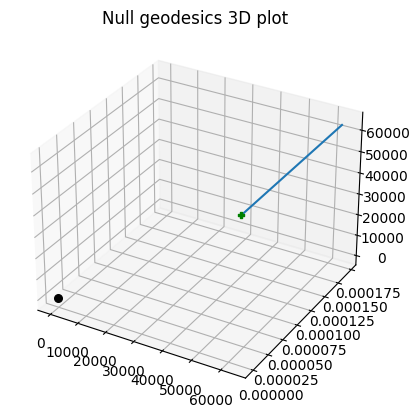

In [479]:
fig = plt.figure()
ax = plt.axes(projection="3d")

x = r * np.sin(theta) * np.cos(phi)
y = r * np.sin(theta) * np.sin(phi)
z = r * np.cos(theta)

ax.plot3D(x, y, z)

# plot a point to show where the BH is
ax.scatter3D(0, 0, 0, s=30, c="black")

# plot a point to show where the starting point is
ax.scatter3D(x[0], y[0], z[0], c="green", marker="P")

ax.set_title("Null geodesics 3D plot")
plt.show()

We setup our initial conditions (based on https://www.roma1.infn.it/teongrav/onde19_20/kerr.pdf) and numerically solve. We solve the geodesic equation as a system of 1st-order differential equations:

$$
\frac{dx^\mu}{ds} = U^\mu
$$

$$
\frac{d U^\mu}{ds} = -\Gamma^\mu_{\alpha \beta} \frac{dx^\alpha}{ds} \frac{dx^\beta}{ds}
$$

And for our initial conditions, we use the following null vector:

$$
U^\mu = \left\langle \frac{r^2 + a^2}{\Delta}, \pm 1, 0, \frac{a}{\Delta} \right\rangle
$$

In [470]:
def metric_d_ds(X, s, metric=kerr_metric, inverse_metric=kerr_inverse_metric):
    """
    The value of the 4 first and 4 second
    derivatives with respect to an affine
    parameter s
    """
    # Create a new vector to hold the new positions and velocities
    # after each step
    u = np.zeros(X.shape)
    # X is a vector with 4 components of position
    # and 4 components of velocity
    x = X[:4]
    velocities = X[4:]
    # Find the first 4 derivatives (dx/ds) - these are the
    # components of 4-velocity
    u[:4] = velocities
    # Find christoffel symbols given the position and the metric
    # here t is coordinate time, not the affine parameter s
    x0, x1, x2, x3 = x
    m_jacob = metric_jacob(metric, x0, x1, x2, x3)
    inverse_m = create_inverse_metric(inverse_metric, x0, x1, x2, x3)
    Gamma = christoffel_4d_from_jacob(m_jacob, inverse_m)
    # Given the christoffel symbols, calculate the next 4
    # derivatives (dU/ds) - these are the components of
    # 4-acceleration
    for mu in range(4):
        for alpha in range(4):
            for beta in range(4):
                # Solve for x components
                # we sum due to the Einstein summation convention
                u[4 + mu] += -Gamma[mu][alpha][beta] * velocities[alpha] * velocities[beta]
    return u

Again, to troubleshoot, we will first use the simpler Schwarzschild metric, and then use the more complex Kerr metric.

In [445]:
def sch_metric(coords, M=15000):
    t = coords[0]
    r = coords[1]
    theta = coords[2]
    phi = coords[3]
    r_s = 2 * M
    g = torch.zeros(4, 4)
    g[0][0] = -(1 - (r_s / r))
    g[1][1] = (1 / (1 - (r_s / r)))
    g[2][2] = r ** 2
    g[3][3] = r ** 2 * (torch.sin(theta) ** 2)
    return g

In [446]:
def inv_sch_metric(coords, M=15000):
    t = coords[0]
    r = coords[1]
    theta = coords[2]
    phi = coords[3]
    r_s = 2 * M
    g = torch.zeros(4, 4)
    g[0][0] = 1 / -(1 - (r_s / r))
    g[1][1] = 1 - (r_s / r)
    g[2][2] = 1 / (r ** 2)
    g[3][3] = 1 / (r ** 2 * (torch.sin(theta) ** 2))
    return g

In [471]:
c = 1 # as we use geometrized units

In [472]:
a = 0.97
M = 15000

In [473]:
t0 = 0
r0 = 6 * M # orbital radius of 4M
theta0 = np.pi / 4
phi0 = 0

In [474]:
delta = r0 ** 2 - 2 * M * r0 + a ** 2
v_t0 = (r0 ** 2 + a ** 2) / delta
v_r0 = c # here, positive is outgoing, negative is ingoing geodesic
v_theta0 = 0
v_phi0 = a / delta

In [475]:
u0 = np.array([t0, r0, theta0, phi0, v_t0, v_r0, v_theta0, v_phi0])

In [476]:
# keep this low, as in geometrized units time is
# in units of length, so any big number is going to
# make the geodesic integrator blow up
tf = 15

In [477]:
x_sol, t_sol = rk4(metric_d_ds, u0, 0, tf, 500)

100%|███████████████████████████████████████████████████████████████| 500/500 [01:40<00:00,  4.97it/s]


In [478]:
r = x_sol[:,1]
theta = x_sol[:,2]
phi = x_sol[:,3]

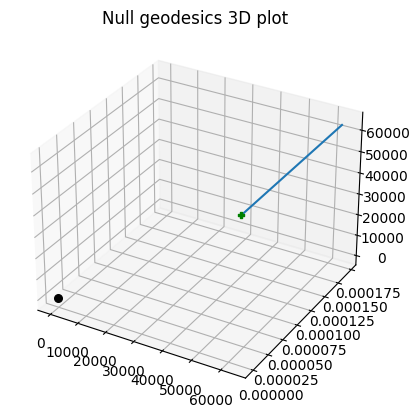

In [479]:
fig = plt.figure()
ax = plt.axes(projection="3d")

x = r * np.sin(theta) * np.cos(phi)
y = r * np.sin(theta) * np.sin(phi)
z = r * np.cos(theta)

ax.plot3D(x, y, z)

# plot a point to show where the BH is
ax.scatter3D(0, 0, 0, s=30, c="black")

# plot a point to show where the starting point is
ax.scatter3D(x[0], y[0], z[0], c="green", marker="P")

ax.set_title("Null geodesics 3D plot")
plt.show()